In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys
import cv2 
import tensorflow as tf
import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np


In [ ]:
cd '/'
cd '/content/drive/My Drive/images'

/content/drive/My Drive/images


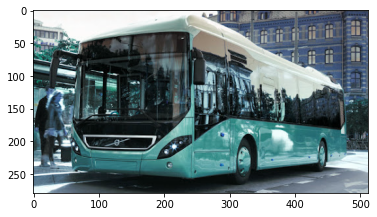

In [ ]:
image = cv2.imread('raw_images/3/unnamed (1).jpg')
plt.imshow(image)
plt.show()

In [ ]:
class_name = os.listdir('raw_images')

In [ ]:
class_name = os.listdir('raw_images')
images_name = []
for i in class_name:
    images_one_class_name = os.listdir('raw_images/{}'.format(i))
    for j in images_one_class_name:
        images_name.append('raw_images/{}/{}'.format(i,j))

In [ ]:
for i in images_name:
    try:
        image = cv2.imread(i)
    except:
        print(i)

In [ ]:
down_width = 256
down_height = 256
down_points = (down_width, down_height)

for i in images_name:
    image = cv2.imread(i)
    prepare_image = cv2.resize(image, down_points, interpolation=cv2.INTER_LINEAR)
    temp_name = i.split('/')
    cv2.imwrite('preprocessed_images/{}/{}{}'.format(temp_name[1], temp_name[2].split('.')[0], '.jpg'), prepare_image)



In [ ]:
IMAGE_SIZE = down_points
BATCH_SIZE = 2

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "preprocessed_images",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "preprocessed_images",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

Found 30 files belonging to 3 classes.
Using 24 files for training.
Found 30 files belonging to 3 classes.
Using 6 files for validation.


In [ ]:
try:
    del model
except:
    None
num_classes = 3

model = Sequential([
  layers.Rescaling(1./255, input_shape=(down_height, down_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_9 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 32, 32, 64)       

In [ ]:
epochs=50
history = model.fit(
  train_ds,
  batch_size = BATCH_SIZE,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
12/12 [==============================] - 3s 182ms/step - loss: 2.7506 - accuracy: 0.2500 - val_loss: 1.0916 - val_accuracy: 0.1667
Epoch 2/50
12/12 [==============================] - 2s 173ms/step - loss: 1.0290 - accuracy: 0.5000 - val_loss: 1.2348 - val_accuracy: 0.0000e+00
Epoch 3/50
12/12 [==============================] - 2s 171ms/step - loss: 0.7050 - accuracy: 0.8750 - val_loss: 1.0332 - val_accuracy: 0.3333
Epoch 4/50
12/12 [==============================] - 2s 171ms/step - loss: 0.2427 - accuracy: 0.9583 - val_loss: 1.1112 - val_accuracy: 0.6667
Epoch 5/50
12/12 [==============================] - 2s 172ms/step - loss: 0.1095 - accuracy: 1.0000 - val_loss: 0.9600 - val_accuracy: 0.3333
Epoch 6/50
12/12 [==============================] - 2s 170ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.7040 - val_accuracy: 0.8333
Epoch 7/50
12/12 [==============================] - 2s 174ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.7703 - val_accuracy: 0.5000
Ep

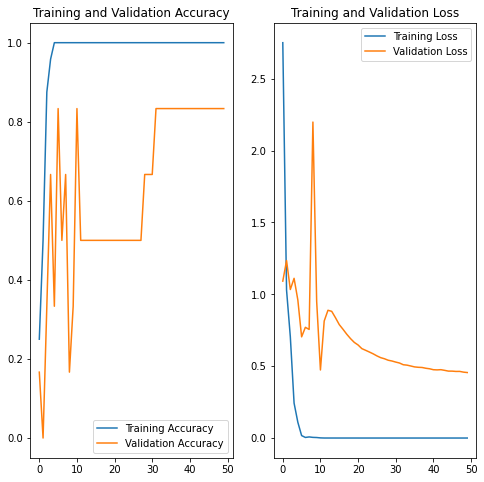

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

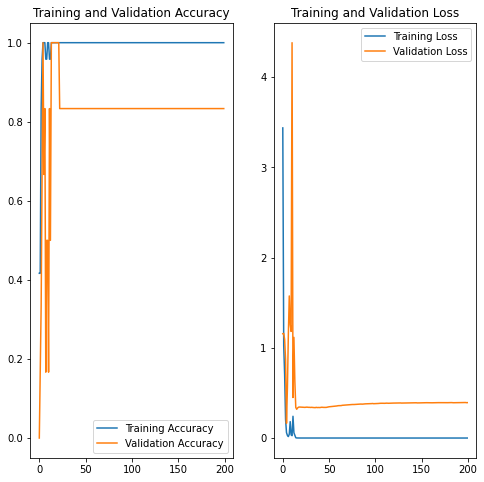

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

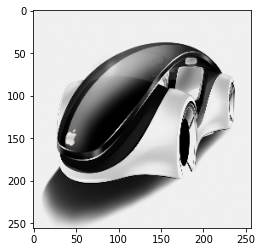

In [ ]:
down_width = 256
down_height = 256
down_points = (down_width, down_height)
image = cv2.imread('raw_test_images/756085455700926.jpg')
prepare_image = cv2.resize(image, down_points, interpolation=cv2.INTER_LINEAR)
prepare_image = prepare_image/255
plt.imshow(prepare_image)
plt.show()

In [ ]:
predict_x = model.predict(prepare_image.reshape(1,256,256,3))
np.argmax(predict_x,axis=1)

array([0])